<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Multiple_Sclerosis_Disease_Using_GradientBoost_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [16]:
df = pd.read_csv('/content/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [8]:
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [11]:
df.shape

(273, 19)

In [12]:
df.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')

Checking for Null values

In [15]:
df.isnull().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [21]:
df['Schooling'] = df['Schooling'].fillna(0)
df['Initial_Symptom'] = df['Initial_Symptom'].fillna(0)

In [17]:
df = df.drop(['Unnamed: 0','Initial_EDSS','Final_EDSS'],axis=1)

In [18]:
df.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [22]:
df.isnull().sum()

Gender                     0
Age                        0
Schooling                  0
Breastfeeding              0
Varicella                  0
Initial_Symptom            0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

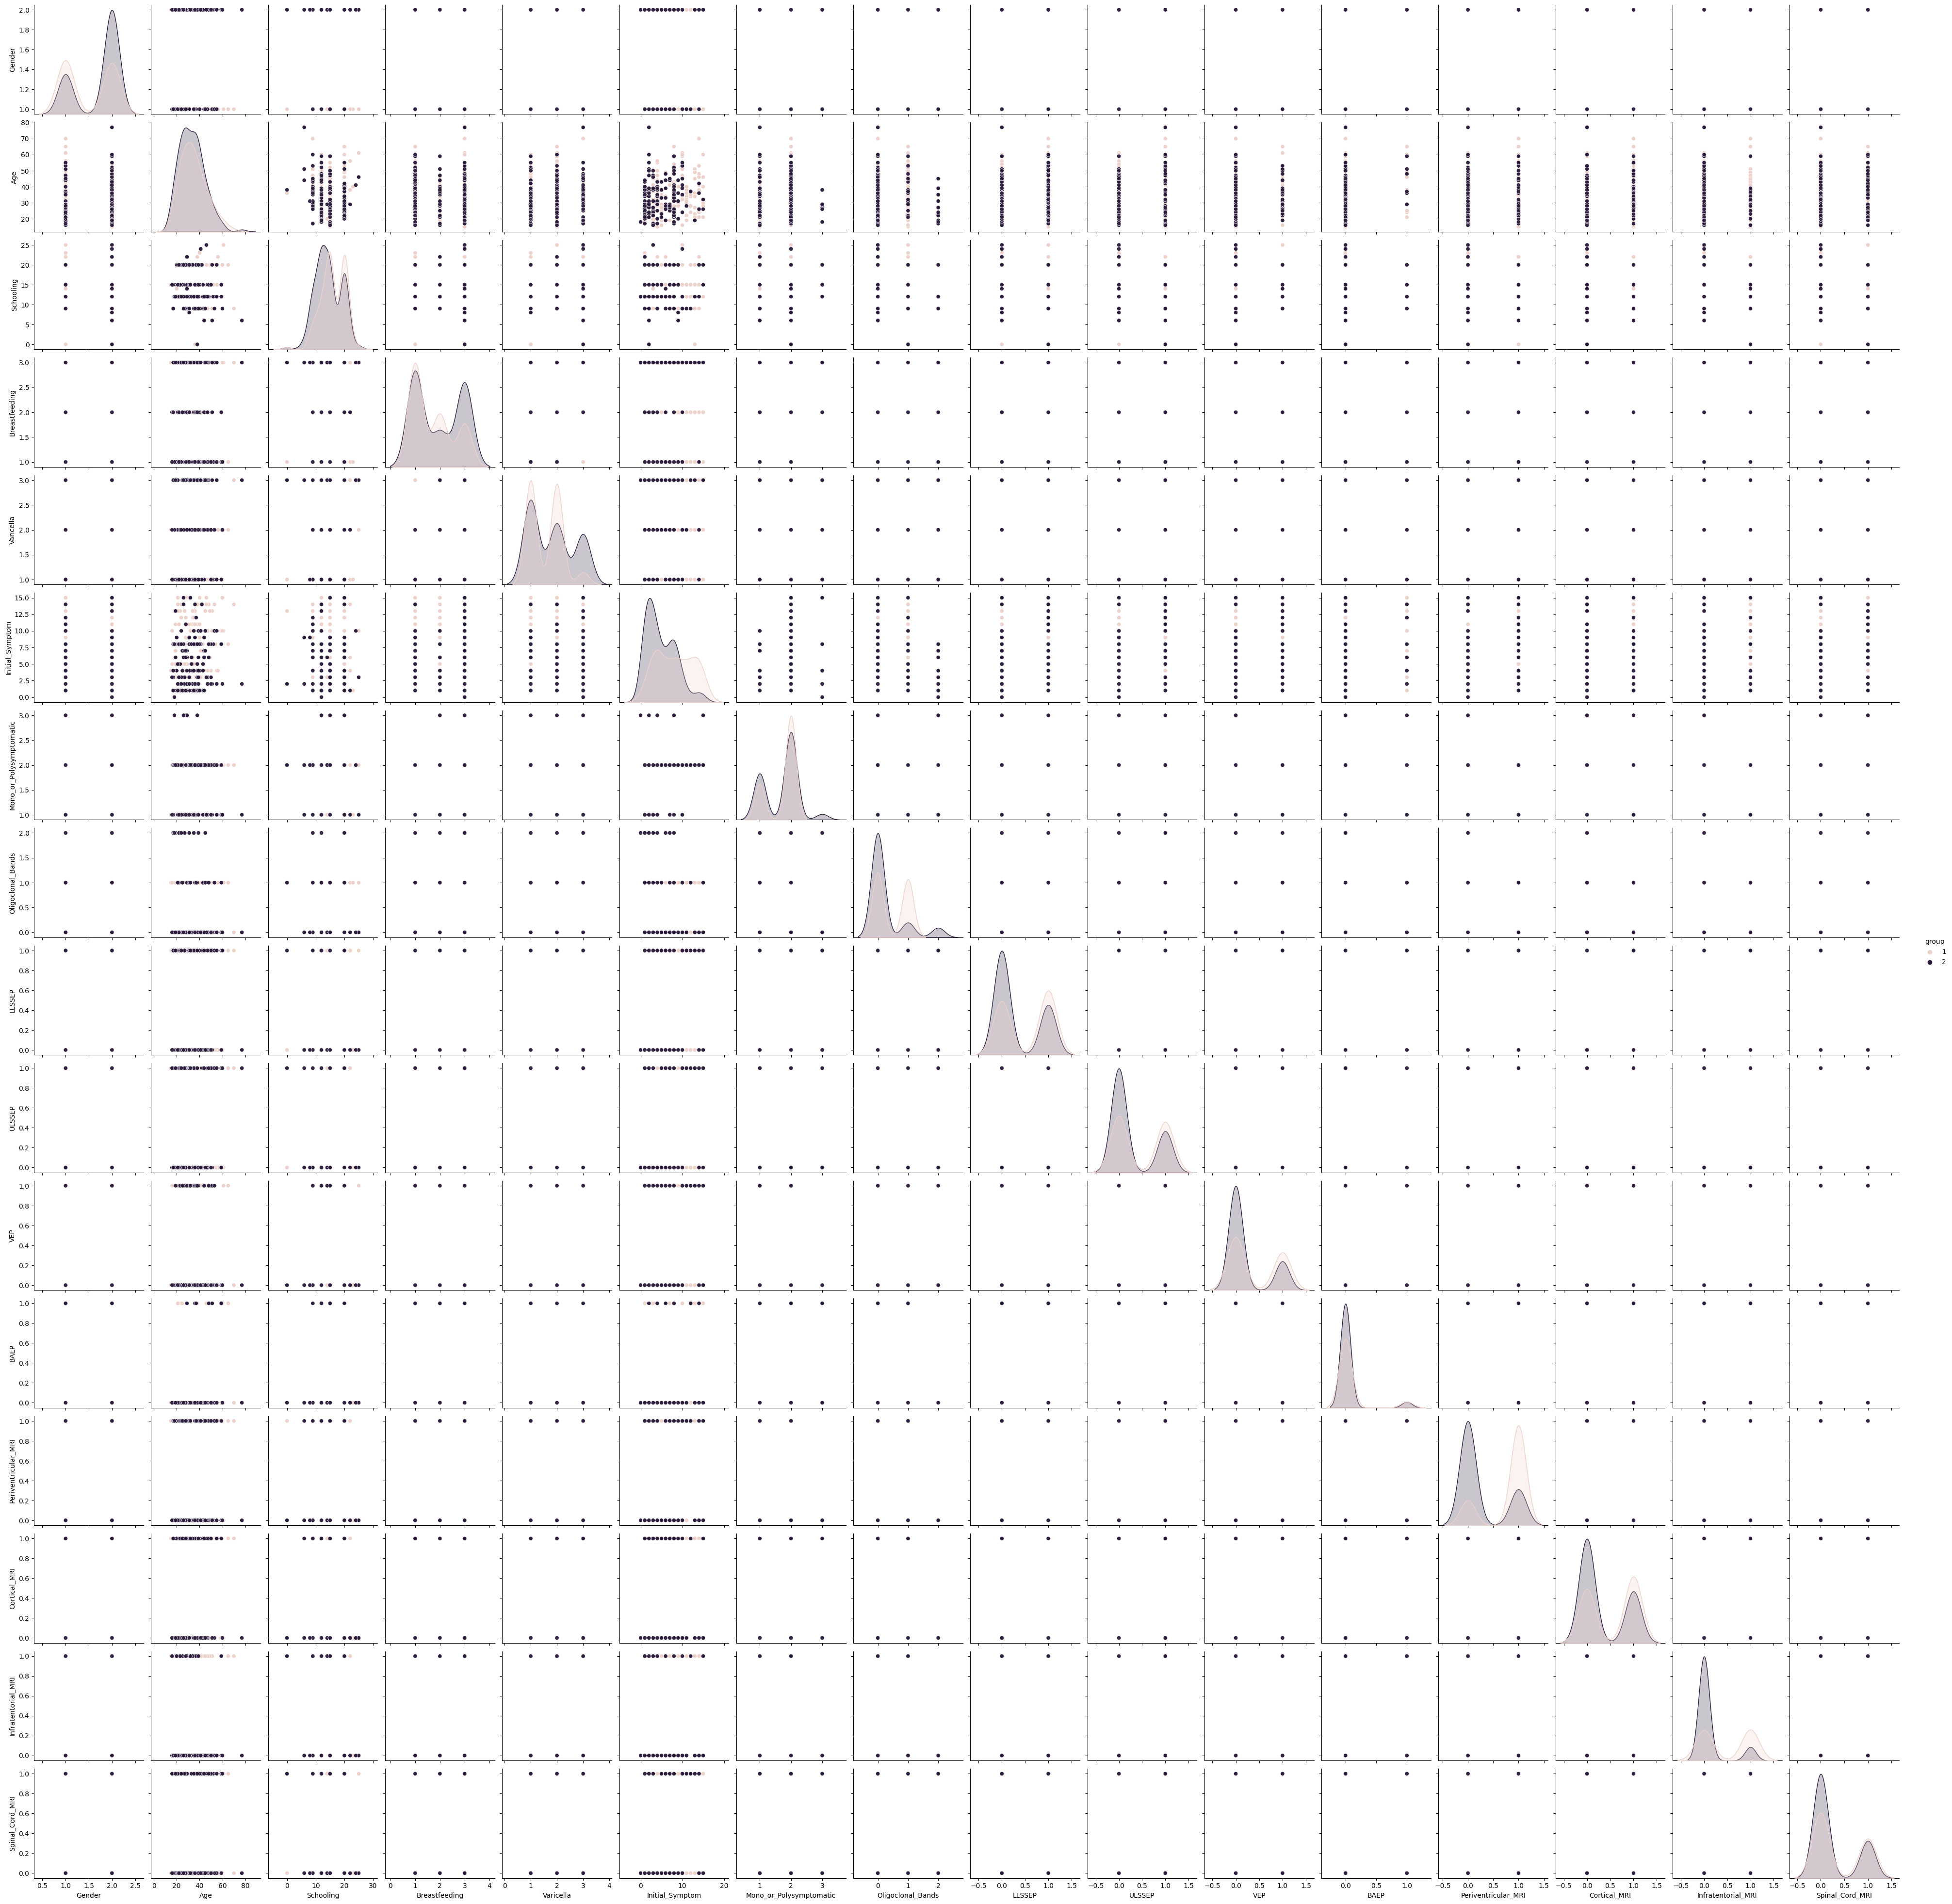

In [23]:
sns.pairplot(df,hue='group')
plt.show()

In [24]:
X = df.iloc[:,:-1]
X

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0


In [25]:
y = df.iloc[:,-1:]
y

,group
0,1
1,1
2,1
3,1
4,1
...,...
268,2
269,2
270,2
271,2


Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
y_train_1d = np.ravel(y_train)

Making GradientBoostingClassifier and choosing best hpyer parameter using Bayesian

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK

In [54]:
para = {
    'loss' : hp.choice('loss',['log_loss', 'exponential']),
    'learning_rate' : hp.uniform('learning_rate',0.1, 1.1),
    'n_estimators' : hp.quniform('n_estimators',50,500,50),
    'criterion' : hp.choice('criterion',['friedman_mse', 'squared_error']),
    'max_depth' : hp.quniform('max_depth',1,5,1)
}

In [55]:
def Bayesian(para):
  GB = GradientBoostingClassifier(
      loss = para['loss'],
      learning_rate = float(para['learning_rate']),
      n_estimators = int(para['n_estimators']),
      criterion = para['criterion'],
      max_depth = int(para['max_depth'])

  )
  accuracy = cross_val_score(GB,X_train,y_train_1d,cv=5).mean()
  return{'loss' : -accuracy , 'status' : STATUS_OK}

In [56]:
trials = Trials()

In [57]:
Best = fmin(fn=Bayesian,space=para,algo=tpe.suggest,max_evals=200,trials=trials)

100%|██████████| 200/200 [03:24<00:00,  1.02s/trial, best loss: -0.8355179704016914]


In [58]:
Best

{'criterion': 1,
 'learning_rate': 0.7496825253416657,
 'loss': 0,
 'max_depth': 1.0,
 'n_estimators': 250.0}

In [61]:
GB = GradientBoostingClassifier(
  criterion = 'squared_error',
  learning_rate = 0.7496825253416657,
  loss = 'log_loss',
  max_depth = 1,
  n_estimators = 250
)

In [62]:
GB.fit(X_train,y_train_1d)

GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.7496825253416657, max_depth=1,
                           n_estimators=250)

Making Prediction Using our Model

In [63]:
y_hat = GB.predict(X_test)

Checking Accuracy

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
print(accuracy_score(y_test,y_hat))

0.8181818181818182


In [66]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        26
           2       0.83      0.83      0.83        29

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.82      0.82      0.82        55



In [67]:
print(confusion_matrix(y_test,y_hat))

[[21  5]
 [ 5 24]]
